In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

ex48

In [5]:
# data for the first few exercises
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([-0.5,0.5,1.5,2.5])


In [6]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))

    def forward(self, x): # We implement the forward pass
        return self.A * x
    
A = 1

model = LinModel(A=A)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(1., requires_grad=True)
A = 1.0


In [7]:
steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Step 0, Loss: 2.25
Step 500, Loss: 0.3750005066394806
Step 1000, Loss: 0.3749999701976776
Step 1500, Loss: 0.3749999701976776
Step 2000, Loss: 0.3749999701976776
Step 2500, Loss: 0.3749999701976776
Step 3000, Loss: 0.3749999701976776
Step 3500, Loss: 0.3749999701976776
Step 4000, Loss: 0.3749999701976776
Step 4500, Loss: 0.3749999701976776
Step 5000, Loss: 0.3749999701976776
Step 5500, Loss: 0.3749999701976776
Step 6000, Loss: 0.3749999701976776
Step 6500, Loss: 0.3749999701976776
Step 7000, Loss: 0.3749999701976776
Step 7500, Loss: 0.3749999701976776
Step 8000, Loss: 0.3749999701976776
Step 8500, Loss: 0.3749999701976776
Step 9000, Loss: 0.3749999701976776
Step 9500, Loss: 0.3749999701976776
A = 0.5000019669532776


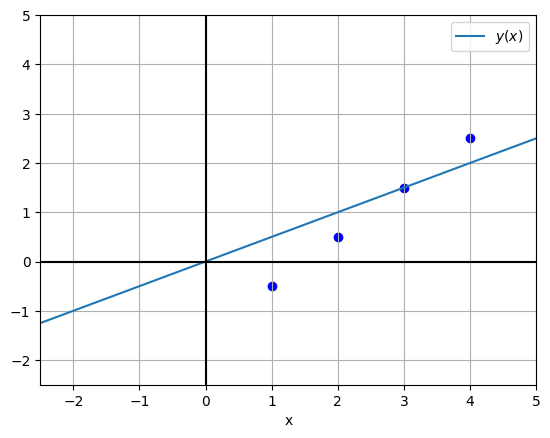

In [8]:
A = 0.5
def lin_func(x,A):
    return A*x

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

In [18]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 5.25
Step 500, Loss: 0.07019560784101486
Step 1000, Loss: 0.05203142762184143
Step 1500, Loss: 0.03856758773326874
Step 2000, Loss: 0.028587706387043
Step 2500, Loss: 0.021190237253904343
Step 3000, Loss: 0.015706943348050117
Step 3500, Loss: 0.01164258923381567
Step 4000, Loss: 0.008629923686385155
Step 4500, Loss: 0.00639681052416563
Step 5000, Loss: 0.0047415741719305515
Step 5500, Loss: 0.0035146214067935944
Step 6000, Loss: 0.0026051716413348913
Step 6500, Loss: 0.00193104799836874
Step 7000, Loss: 0.0014313672436401248
Step 7500, Loss: 0.001060999813489616
Step 8000, Loss: 0.0007864611689001322
Step 8500, Loss: 0.0005829609581269324
Step 9000, Loss: 0.000432122586062178
Step 9500, Loss: 0.00032031763112172484
A = 0.9871755838394165
b = -1.4622949361801147


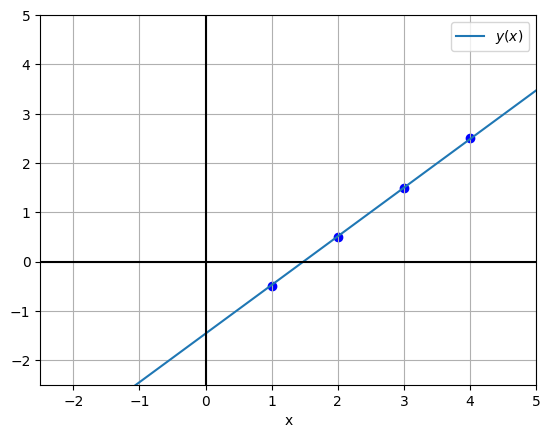

In [20]:
A = 0.9871755838394165
b = -1.4622949361801147
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.4 Non-linear data

In [21]:
# next data which is non-linear
x_tensor = torch.tensor([1, 2, 3, 4])
y_tensor = torch.tensor([1,1,1.5,2.5])

In [83]:
class LinModel(torch.nn.Module):

    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 0
b = -1

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.A.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(-1., requires_grad=True)
A = 0.0
b = -1.0
Step 0, Loss: 6.625
Step 500, Loss: 0.1784907430410385
Step 1000, Loss: 0.14847642183303833
Step 1500, Loss: 0.126228928565979
Step 2000, Loss: 0.10973823070526123
Step 2500, Loss: 0.09751472622156143
Step 3000, Loss: 0.08845420181751251
Step 3500, Loss: 0.08173821866512299
Step 4000, Loss: 0.07676007598638535
Step 4500, Loss: 0.07307007908821106
Step 5000, Loss: 0.07033493369817734
Step 5500, Loss: 0.0683075562119484
Step 6000, Loss: 0.06680478155612946
Step 6500, Loss: 0.06569083780050278
Step 7000, Loss: 0.06486520916223526
Step 7500, Loss: 0.06425317376852036
Step 8000, Loss: 0.06379950046539307
Step 8500, Loss: 0.06346326321363449
Step 9000, Loss: 0.06321398168802261
Step 9500, Loss: 0.06302926689386368
A = 0.5164846181869507
b = 0.20153392851352692


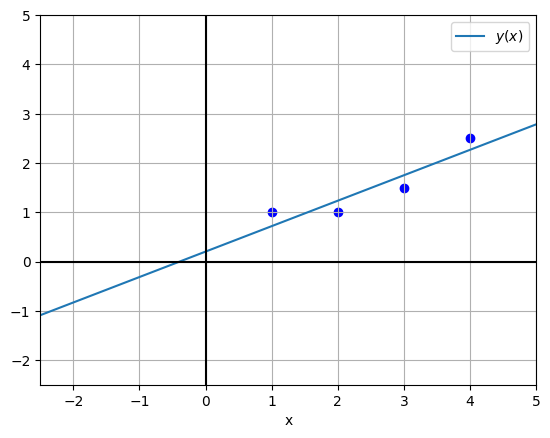

In [84]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

4.5 Linear model + ReLU

In [95]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLU(torch.nn.Module):
    def __init__(self, w=1.0, b=0.0):
        super().__init__()
        # Define the linear parameters
        self.w = torch.nn.Parameter(torch.tensor(float(w)))  # Weight
        self.b = torch.nn.Parameter(torch.tensor(float(b)))  # Bias

    def forward(self, x):
        # Linear transformation
        h = self.w * x + self.b
        # ReLU activation
        y = torch.relu(h)
        return y
    
w = 1
b = 0

model = NeuronModelWithReLU(w=w, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

A_plt = model.w.data.item()
b_plt = model.b.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w = 1.0
b = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.08004893362522125
Step 1000, Loss: 0.07550784200429916
Step 1500, Loss: 0.07214190810918808
Step 2000, Loss: 0.0696469247341156
Step 2500, Loss: 0.06779757887125015
Step 3000, Loss: 0.06642673909664154
Step 3500, Loss: 0.06541063636541367
Step 4000, Loss: 0.06465749442577362
Step 4500, Loss: 0.06409918516874313
Step 5000, Loss: 0.06368540972471237
Step 5500, Loss: 0.06337867677211761
Step 6000, Loss: 0.06315132975578308
Step 6500, Loss: 0.06298279762268066
Step 7000, Loss: 0.06285785138607025
Step 7500, Loss: 0.06276526302099228
Step 8000, Loss: 0.06269662827253342
Step 8500, Loss: 0.06264574825763702
Step 9000, Loss: 0.0626080334186554
Step 9500, Loss: 0.06258010864257812
w = 0.5064135193824768
b = 0.2311452478170395


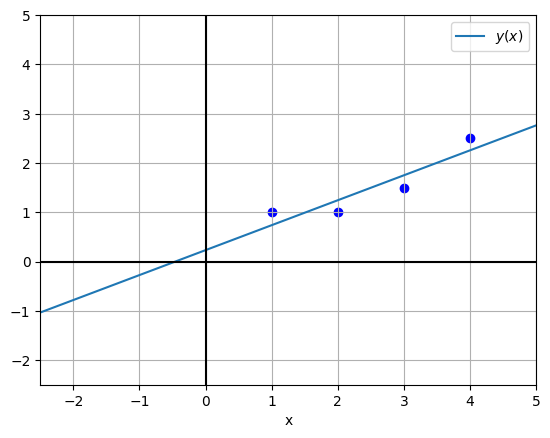

In [96]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A_plt,b_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

question for TØ: Am I doing this right? I use the parameters A,b that was outputted after training my LinearModel as the weight and bias parameter. I then feed h=w*x+b into ReLU.(h)

4.6 (Linear model + ReLU) × 2

In [112]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLUx2(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias2

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        h2 = self.w2 * a1 + self.b2
        # ReLU activation
        y = torch.relu(h2)

        return y
    
w = 1
b = 0

model = NeuronModelWithReLUx2(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

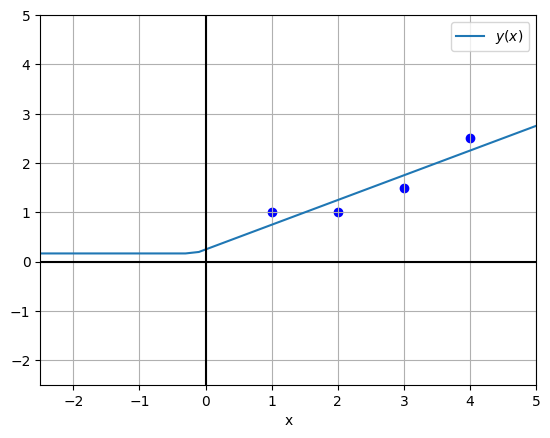

In [114]:
def funkyfunc(x,w1,b1,w2,b2):
    y = w2*torch.relu(w1 * x + b1)+b2
    return y

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

TØ: burde den ikke være non-linear?

4.7 Linear model + ReLU + Linear model

In [109]:
# basically we first compute h as in the previous examples, and then we put h through a new function, the ReLU(h), which outputs 1 if h>1, o/w 0.

class NeuronModelWithReLuAndAnotherLinear(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model with some starting values for w and b
w = 1.0
b = 0.0
model = NeuronModelWithReLuAndAnotherLinear(w1=w, b1=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(x_tensor)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 1.375
Step 500, Loss: 0.07779781520366669
Step 1000, Loss: 0.07212861627340317
Step 1500, Loss: 0.06863006204366684
Step 2000, Loss: 0.06643667072057724
Step 2500, Loss: 0.06504503637552261
Step 3000, Loss: 0.06415392458438873
Step 3500, Loss: 0.06357923150062561
Step 4000, Loss: 0.0632065162062645
Step 4500, Loss: 0.06296371668577194
Step 5000, Loss: 0.06280498206615448
Step 5500, Loss: 0.06270091980695724
Step 6000, Loss: 0.0626324936747551
Step 6500, Loss: 0.06258752197027206
Step 7000, Loss: 0.06255784630775452
Step 7500, Loss: 0.062538281083107
Step 8000, Loss: 0.06252531707286835
Step 8500, Loss: 0.06251675635576248
Step 9000, Loss: 0.06251111626625061
Step 9500, Loss: 0.06250736117362976
w1 = 0.7039342522621155
b1 = 0.113

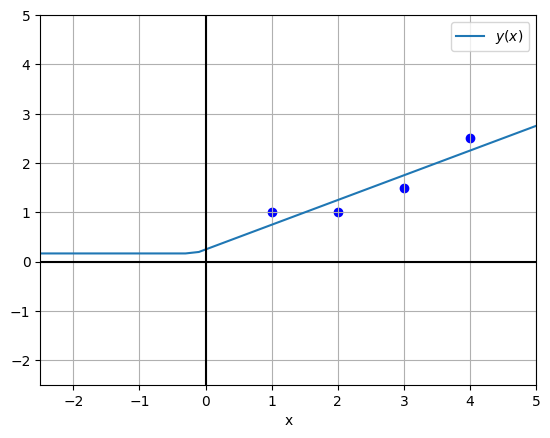

In [111]:
def funkyfunc(x,w1,b1,w2,b2):
    y = w2*torch.relu(w1 * x + b1)+b2
    return y

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_tensor, y_tensor, color='blue', label='Data points')

plt.show()  # Display the plot

ex49: Activation functions

In [138]:
f = lambda x: x - 0.5
def g(x):
    x0 = 1.25
    return torch.where(x>x0, f(x), f(x0))

x_train = torch.tensor([-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4., ])
y_train = g(x_train)


In [155]:
# 5.2 ReLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.relu(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.2750000059604645
Step 500, Loss: 0.11096793413162231
Step 1000, Loss: 0.09139209985733032
Step 1500, Loss: 0.07940275967121124
Step 2000, Loss: 0.07123095542192459
Step 2500, Loss: 0.06507781893014908
Step 3000, Loss: 0.060073595494031906
Step 3500, Loss: 0.05579356104135513
Step 4000, Loss: 0.05202747508883476
Step 4500, Loss: 0.048668477684259415
Step 5000, Loss: 0.04565849155187607
Step 5500, Loss: 0.04296233505010605
Step 6000, Loss: 0.04055460914969444
Step 6500, Loss: 0.03775825724005699
Step 7000, Loss: 0.033003244549036026
Step 7500, Loss: 0.02870088256895542
Step 8000, Loss: 0.024838974699378014
Step 8500, Loss: 0.02140885591506958
Step 9000, Loss: 0.018397754058241844
Step 9500, Loss: 0.015786102041602135
w1 = 0.8145

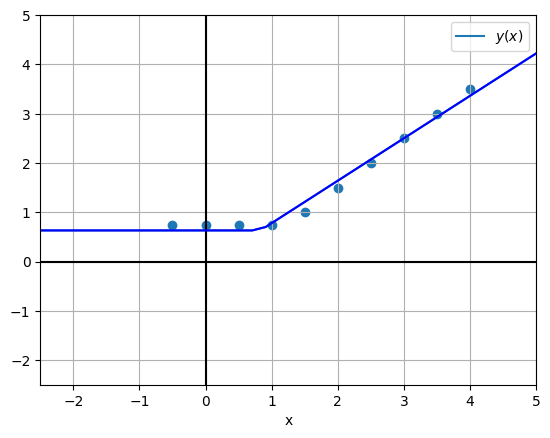

In [156]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [153]:
# 5.3 Leaky ReLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        # Linear transformation
        h1 = self.w1 * x + self.b1
        # ReLU activation
        a1 = torch.nn.LeakyReLU()(h1)
        # Linear transformation
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.2757524847984314
Step 500, Loss: 0.1115487590432167
Step 1000, Loss: 0.09197863936424255
Step 1500, Loss: 0.08004038035869598
Step 2000, Loss: 0.07192297279834747
Step 2500, Loss: 0.06581442058086395
Step 3000, Loss: 0.060841530561447144
Step 3500, Loss: 0.0565793402493
Step 4000, Loss: 0.05281855911016464
Step 4500, Loss: 0.04945342615246773
Step 5000, Loss: 0.04642733186483383
Step 5500, Loss: 0.043706443160772324
Step 6000, Loss: 0.04126685857772827
Step 6500, Loss: 0.03876694291830063
Step 7000, Loss: 0.03401462361216545
Step 7500, Loss: 0.02969897910952568
Step 8000, Loss: 0.025805965065956116
Step 8500, Loss: 0.022329477593302727
Step 9000, Loss: 0.019259696826338768
Step 9500, Loss: 0.016580387949943542
w1 = 0.813887536

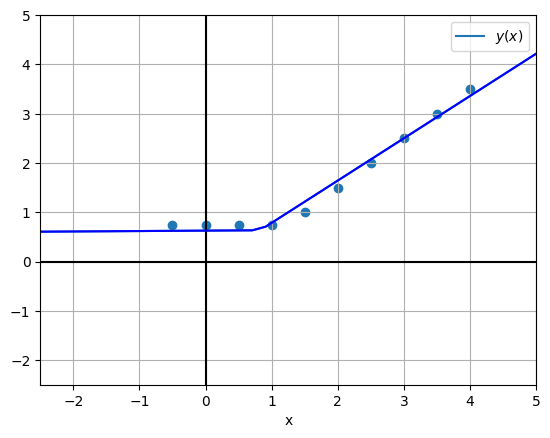

In [154]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [151]:
# 5.4 SiLU

class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        self.silu = torch.nn.SiLU()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        h1 = self.w1 * x + self.b1        
        a1 = self.silu(h1)
        y = self.w2 * a1 + self.b2

        return y
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.23217880725860596
Step 500, Loss: 0.10602231323719025
Step 1000, Loss: 0.0774741843342781
Step 1500, Loss: 0.06533323973417282
Step 2000, Loss: 0.05968158692121506
Step 2500, Loss: 0.05664113909006119
Step 3000, Loss: 0.054661620408296585
Step 3500, Loss: 0.05311565473675728
Step 4000, Loss: 0.05174802988767624
Step 4500, Loss: 0.05045487359166145
Step 5000, Loss: 0.049194227904081345
Step 5500, Loss: 0.04794948548078537
Step 6000, Loss: 0.04671446606516838
Step 6500, Loss: 0.045487284660339355
Step 7000, Loss: 0.04426773265004158
Step 7500, Loss: 0.043056320399045944
Step 8000, Loss: 0.04185394197702408
Step 8500, Loss: 0.04066171497106552
Step 9000, Loss: 0.039480600506067276
Step 9500, Loss: 0.03831173852086067
w1 = 0.79680

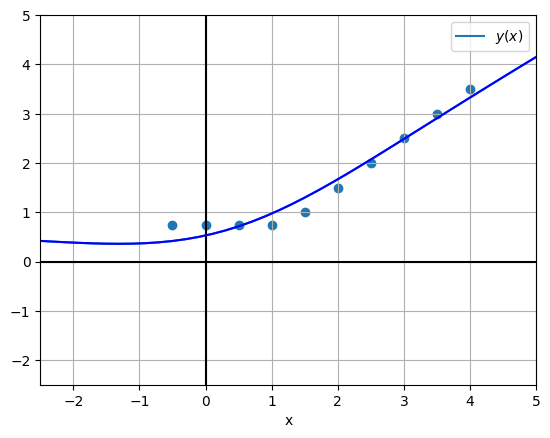

In [152]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

5.5 Softplus

In [145]:
class Neuron49(torch.nn.Module):
    def __init__(self, w1=1.0, b1=0.0, w2=1.0, b2=0.0):
        super().__init__()
        self.softplus = torch.nn.Softplus()
        # Define the linear parameters
        self.w1 = torch.nn.Parameter(torch.tensor(float(w1)))  # Weight1
        self.b1 = torch.nn.Parameter(torch.tensor(float(b1)))  # Bias1
        self.w2 = torch.nn.Parameter(torch.tensor(float(w2)))  # Weight2
        self.b2 = torch.nn.Parameter(torch.tensor(float(b2)))  # Bias1

    def forward(self, x):
        x.view(-1, 1)
        h1 = self.w1 * x + self.b1        
        a1 = self.softplus(h1)
        y = self.w2 * a1 + self.b2
        return y.flatten()
    
# Initialize the model
model = Neuron49(w1=1.0, b1=0.0)

# Set up an optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000
for step in range(steps):
    # Forward pass: make predictions
    y_pred = model(x_train)
    # Compute loss between model's predictions and custom-generated y_train
    loss = loss_fn(y_pred, y_train)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 500 steps
    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

# Print the final parameters after training
for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

w1_plt = model.w1.data.item()
b1_plt = model.b1.data.item()
w2_plt = model.w2.data.item()
b2_plt = model.b2.data.item()

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0., requires_grad=True)
w1 = 1.0
b1 = 0.0
w2 = 1.0
b2 = 0.0
Step 0, Loss: 0.25170356035232544
Step 500, Loss: 0.053489334881305695
Step 1000, Loss: 0.052787117660045624
Step 1500, Loss: 0.05225411057472229
Step 2000, Loss: 0.05179531127214432
Step 2500, Loss: 0.051368944346904755
Step 3000, Loss: 0.05095664784312248
Step 3500, Loss: 0.050550270825624466
Step 4000, Loss: 0.05014632269740105
Step 4500, Loss: 0.049743350595235825
Step 5000, Loss: 0.049340687692165375
Step 5500, Loss: 0.04893806204199791
Step 6000, Loss: 0.048535414040088654
Step 6500, Loss: 0.048132799565792084
Step 7000, Loss: 0.04773031920194626
Step 7500, Loss: 0.04732796549797058
Step 8000, Loss: 0.046925827860832214
Step 8500, Loss: 0.046524085104465485
Step 9000, Loss: 0.04612245410680771
Step 9500, Loss: 0.045721475034952164
w1 = 

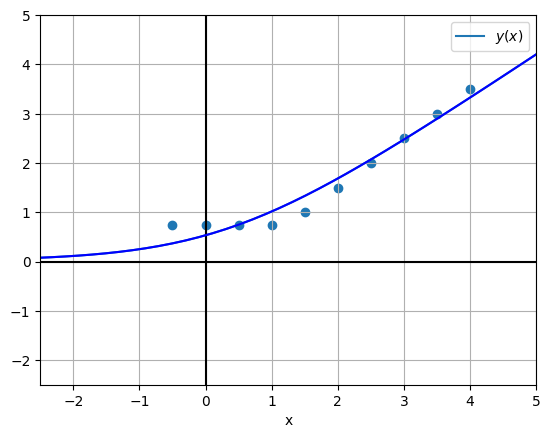

In [150]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = model(xs) #funkyfunc(xs,w1_plt,b1_plt,w2_plt,b2_plt)

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.plot(xs.detach().numpy(), ys.detach().numpy(), color='blue', label='Data points')  # Convert to numpy
plt.scatter(x_train,y_train)

plt.show()  # Display the plot

In [163]:
# Define training loop
steps = 10000
learning_rate = 0.01

for name, model in models.items():
    print(f"\nTraining model with {name} activation:")
    
    # Define an optimizer for each model
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_fn = torch.nn.MSELoss()
    
    for step in range(steps):
        # Reshape x_train for compatibility
        x_train = x_train.view(-1, 1)
        
        # Forward pass: make predictions
        y_pred = model(x_train)
        
        # Compute loss between model's predictions and y_train
        loss = loss_fn(y_pred, y_train.view(-1, 1))
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss every 500 steps
        if step % 500 == 0:
            print(f"Step {step}, Loss: {loss.item()}")
    
    # Print the final parameters after training
    print(f"\nFinal parameters for model with {name} activation:")
    for param_name, parameter in model.named_parameters():
        print(param_name, '=', parameter.data)




Training model with ReLU activation:
Step 0, Loss: 0.00010606473369989544
Step 500, Loss: 9.564053470967337e-05
Step 1000, Loss: 8.626964699942619e-05
Step 1500, Loss: 7.783349428791553e-05
Step 2000, Loss: 7.023652142379433e-05
Step 2500, Loss: 6.339667743304744e-05
Step 3000, Loss: 5.723676804336719e-05
Step 3500, Loss: 5.168712232261896e-05
Step 4000, Loss: 4.66897981823422e-05
Step 4500, Loss: 4.218672984279692e-05
Step 5000, Loss: 3.813036164501682e-05
Step 5500, Loss: 3.447438939474523e-05
Step 6000, Loss: 3.11798467009794e-05
Step 6500, Loss: 2.8207636205479503e-05
Step 7000, Loss: 2.55287486652378e-05
Step 7500, Loss: 2.3112434064387344e-05
Step 8000, Loss: 2.0932659026584588e-05
Step 8500, Loss: 1.8964699847856537e-05
Step 9000, Loss: 1.7188762285513803e-05
Step 9500, Loss: 1.5583862477797084e-05

Final parameters for model with ReLU activation:
input_layer.weight = tensor([[-0.3697],
        [ 0.2623],
        [-0.9362],
        [ 0.7974],
        [ 0.4225],
        [ 0.5612

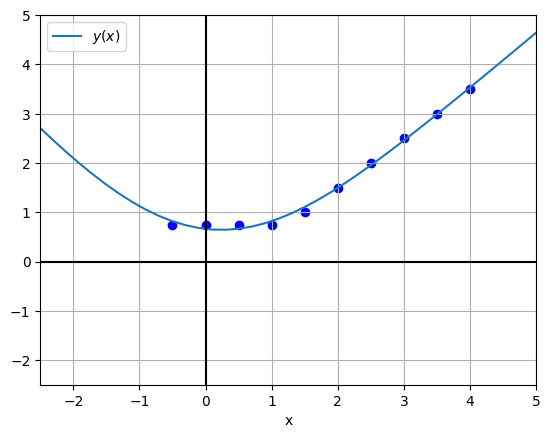

In [165]:
# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True).view(-1, 1)  # Reshape to (100, 1)
ys = model(xs)  # Now this should work

with torch.no_grad():
    ax.plot(xs.detach().numpy(), ys.detach().numpy(), label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])
ax.set_ylim([-2.5, 5])
ax.legend()

# Plot data points
plt.scatter(x_train.detach().numpy(), y_train.detach().numpy(), color='blue', label='Data points')  # Convert to numpy

plt.show()  # Display the plot
